In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
import pickle
from sklearn.model_selection import train_test_split

In [ ]:
model = keras.models.load_model('ResNet50_Results\model_ResNet50')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 30, 2048)         8192      
 ormalization)                                                   
                                                                 
 bidirectional (Bidirectiona  (None, 30, 128)          1081856   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 30, 128)          98816     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 30, 128)          98816     
 nal)                                                            
                                                                 
 seq_self_attention (SeqSelf  (None, 30, 128)          8

In [ ]:
with open (r"D:\UCFSports\ResNet50_Results\X_ResNet50.p", 'rb') as fp:
  X = pickle.load(fp)

with open (r"D:\UCFSports\ResNet50_Results\Y_ResNet50.p", 'rb') as fp:
  Y = pickle.load(fp)

In [ ]:
def pad_into_array(list, total_length):
  T = []
    
  for i in range(len(list)):
    pad = total_length - X[i].shape[0]
    if pad <= 0:
      T.append(list[i][:total_length, :])
    else:
      T.append(np.pad(list[i], [(0, pad), (0, 0)]))
  
  return np.array(T)

In [ ]:
max_length = 30
X = pad_into_array(X, max_length)

print(type(X))
print(X.shape)
print(type(Y))
print(Y.shape)

<class 'numpy.ndarray'>
(150, 30, 2048)
<class 'numpy.ndarray'>
(150, 10)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(120, 30, 2048)
(120, 10)
(30, 30, 2048)
(30, 10)


In [ ]:
output = 'ResNet50_Results/Confusion_Matrix_ResNet50.png'

classes=['Diving', 'Golf-Swing','Kicking', 'Lifting', 'Riding-Horse', 'Run', 'Skateboarding', 'Swing-Bench', 'Swing-Side', 'Walk']

print(classes)

['Diving', 'Golf-Swing', 'Kicking', 'Lifting', 'Riding-Horse', 'Run', 'Skateboarding', 'Swing-Bench', 'Swing-Side', 'Walk']


In [ ]:
test_scores = model.evaluate(X_test, Y_test, verbose=0)

print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

predictions = model.predict(X_test)


Test loss: 1.6335452795028687
Test accuracy: 0.8333333134651184


In [ ]:
Y_pred = np.argmax(predictions, axis=1)

Y_true = np.argmax(Y_test, axis=1)

conf_matrix = tf.math.confusion_matrix(labels=Y_true, predictions=Y_pred).numpy()

In [ ]:
con_mat_norm = np.around(conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)

print(con_mat_df)

               Diving  Golf-Swing  Kicking  Lifting  Riding-Horse  Run  \
Diving            1.0        0.00     0.00      0.0           0.0  0.0   
Golf-Swing        0.0        0.67     0.33      0.0           0.0  0.0   
Kicking           0.0        0.00     1.00      0.0           0.0  0.0   
Lifting           0.0        0.00     0.00      1.0           0.0  0.0   
Riding-Horse      0.0        0.00     0.00      0.0           1.0  0.0   
Run               0.0        0.40     0.00      0.0           0.0  0.6   
Skateboarding     0.0        0.00     0.00      0.0           0.0  0.0   
Swing-Bench       0.0        0.00     0.00      0.0           0.0  0.0   
Swing-Side        0.0        0.00     0.00      0.0           0.0  0.0   
Walk              0.0        0.20     0.00      0.0           0.0  0.0   

               Skateboarding  Swing-Bench  Swing-Side  Walk  
Diving                   0.0          0.0         0.0   0.0  
Golf-Swing               0.0          0.0         0.0   0.0  

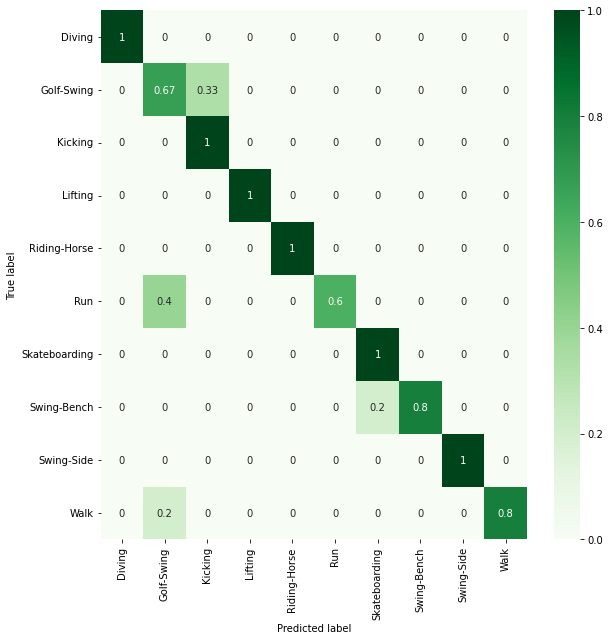

In [ ]:
figure = plt.figure(figsize=(9, 9))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Greens)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig(output, format="png", facecolor='white', transparent=False)